# **Project Title:**

## Formulated questions

Modeling
Multiple Linear Regression, Other relevant models, tune models where possible
Metrics of success; accuracy, RMSE, classification report

Conclusion(s)

Recommendations

Next Steps


Question: For this project, you will use multiple linear regression modeling to analyze house sales in a northwestern county

If you are struggling to define a stakeholder, we recommend you complete a project for a real estate agency that helps homeowners buy and/or sell homes. A business problem you could focus on for this stakeholder is the need to provide advice to homeowners about how home renovations might increase the estimated value of their homes, and by what amount.



## **Business Overview**
## _Will your home renovations pay off?_

>> ### **Introduction**

* In this project, the task is to undertake research on property market in King County and to determine the best price for the houses within the neighbourhoods for a real estate agency.

* The objective of this project is to utilize multiple linear regression modeling to evaluate house sales data in King County Washington, USA. The aim is to gain insights and make predictions about the factors that affect house sales in the area as well as lucrative neighbourhoods to invest in while using statistical techniques to support relevant recommendations.

* Remodeling certain areas of a property is an excellent way for homeowners to add increased functionality and beauty to a property at someone else's expense. By choosing the right project to enhance your living space, a significant portion of the expense can be passed on to future owners in the form of increased property values


>> ### **Business Problem / Problem Statement**

The real estate agency needs to provide advice to homeowners regarding how home renovations can potentially increase the estimated value of their properties and homes and by what amount. This information will assist the real estate agency in advising their clients about how to make informed decisions regarding home renovations, and in turn, assist homeowners in maximizing the return on their investment when selling their properties.


>> ### **Proposal**

* We will focus on analysing house sales in a northwestern county for a possible stakeholder, a real estate agency helping homeowners buy and/or sell homes. Specifically, we will address the business problem of providing homeowners advice on how home renovations can increase the estimated value of their homes and by what amount.

* 



## **Data Understanding**

* This project uses the King County House Sales dataset, which can be found in "kc_house_data.csv"

* One of the challenges that may arise in this project is the incomplete or ambiguous description of the column names in the dataset. However, with thorough research or good judgment, we can understand the data and make informed decisions on which variables to use in our analysis. 

* Another challenge is ensuring that the linear regression model we develop adds value to our analysis, rather than simply fulfilling the project's requirement. 

* The dataset includes information on house sales in King County such as the prices, the design, the size in square footages, the location etc. Others can be found at ['Property Schema'](https://github.com/learn-co-curriculum/dsc-phase-2-project-v2-3/blob/main/data/column_names.md)

* ???Where are renovations generally undertaken in property???

### *Objectives*

* To determine the increase in prices of property due to renovations.
* 
* 

## **Data Preparation**

In [90]:
# Importing relevant libraries

# Pandas for reading the data and analysis
import pandas as pd

# Numpy for numbers
import numpy as np

# Seaborn and Matplotlib for Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib nbagg
%matplotlib inline

# Statsmodels and Scipy for Statistical Analysis
from statsmodels.stats.power import TTestIndPower, TTestPower
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Warnings to remove warnings
#import warnings
#warnings.filterwarnings("ignore")

### Reading the data

* The below code reads the CSV file 'kc_house_data.csv'  using the pandas library. The data is loaded into a pandas DataFrame object named 'df'. It then views the first few rows. 

* The cells that follow check for overview information on the data and then calls for descriptive statistics of the dataset.

* Other important checks include checking the shape of the data, checking the columns and checking for duplicated entries as well as drops them permanently from the dataset.

In [91]:
# Reading the data and viewing 
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [92]:
# Getting information on what our dataset contains
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [93]:
# Getting the shape of the data
df.shape

(21597, 21)

In [94]:
# Validation of the columns 
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [95]:
# checking for duplicates in the whole dataset
df.duplicated().sum()

0

In [96]:
# Checkng for duplicates in the subset column "id"
df['id'].duplicated().sum()

177

 #### The column "id" is a unique identifier for a house and thus we drop those that are duplicated and retain the first entry. Inplace= True is added to ensure the change is carried foward when the data is called again

* #### This is confirmed using the ```.shape``` method

In [97]:
# Permanently dropping duplicates from the subset "id"
df.drop_duplicates(subset='id', keep='first', inplace=True)

In [98]:
# confirming dropped rows using the shape
df.shape

(21420, 21)

In [99]:
# Cghecking for null values in the dataset
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2353
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3804
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [100]:
# Dropping null values in rows in the 'yr_renovated' and 'waterfront' columns
df.dropna(subset=['yr_renovated', 'waterfront'], inplace=True)

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819


* ##### There are columns in the dataset that may not be useful in our evaluation and we thus drop them by first initializing the list called *dropped* and then dropping them from our dataset

In [101]:
# Initializing a list for columns to drop
dropped = ['id', 'date', 'view', 'condition', 'lat', 'long']

In [102]:
# Dropping the columns
df.drop(dropped, axis=1, inplace=True)

* ##### In the cells below, the column 'grade' is split for its values and only the first section is singled out to be converted into numeric type and used as a scale for measuring the grade of the houses / properties 
* ##### Shifting has been done so that the grading parameters may start from 1.
* ##### From 1 to 11, where the lowest has ``1 as Poor``, with a midpoint having ``7 as average``, and the highest being ``11 as Mansion``

In [103]:
df['grade'].value_counts()

7 Average        6504
8 Good           4429
9 Better         1922
6 Low Average    1459
10 Very Good      832
11 Excellent      288
5 Fair            163
12 Luxury          66
4 Low              16
13 Mansion         11
3 Poor              1
Name: grade, dtype: int64

In [104]:
# Converting the 'grade' column to numeric dtype and shifting the scale by 2
df['grade'] = df['grade'].map(lambda x: x.split(' ')[0]).astype(int) - 2

In [105]:
# Transforming 'yr_renovated' column into a categorical variable with `renovated` and `not_renovated` 
def replace(x):
    """A simple function to categorize the column into renovated and not_renovated"""
    if x > 0:
        str_ = str(x).replace(str(x), "renovated")
    else:
        str_ = str(x).replace(str(x), "not renovated")
    return str_

# Renaming our coulumn and calling our function on the dataset
df['renovated'] = df.yr_renovated.map(replace)

# Viewing the changes
df.renovated.value_counts()

# Dropping the original column
df.drop('yr_renovated', axis=1, inplace=True)

##### Replacing the '?' in the column 'sqft_basement' with zero values since the entries in those columns showed similar areas for "sqft_living" and "sqft_above'

In [106]:
# Replacing the '?' character with "0.0"
df['sqft_basement'].replace({'?': "0.0"}, inplace=True)

# Converting the column 'sqft_basement' to an integer column
df['sqft_basement'] = df.sqft_basement.astype(float)

>> ##### Checking for outliers in our price column

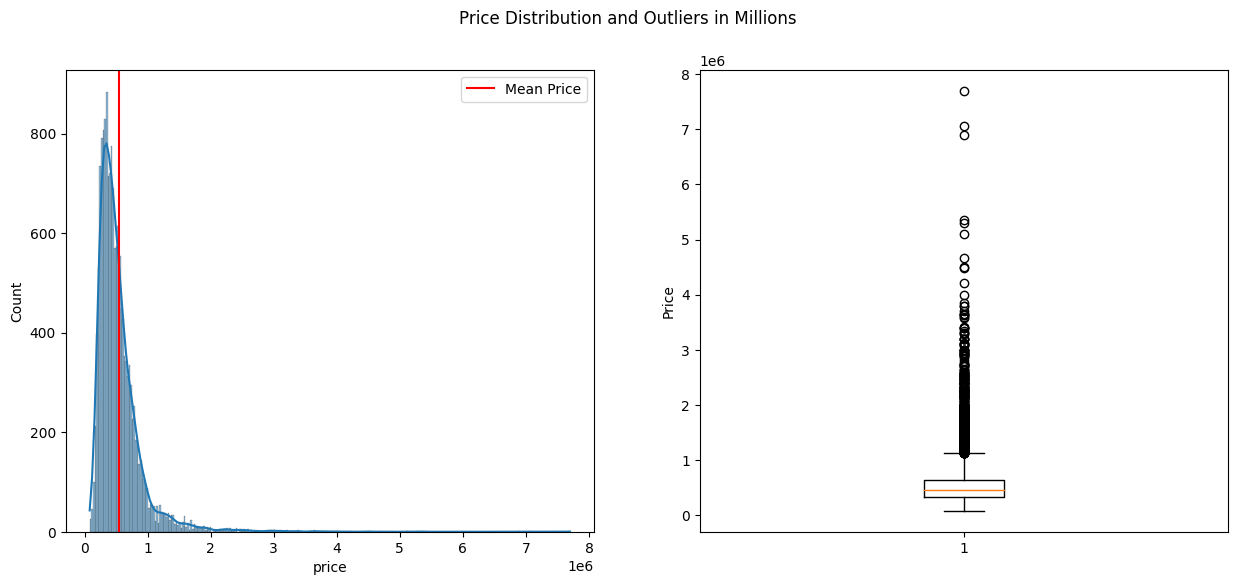

In [107]:
# Creating a figure space and visualizing
fig, ax = plt.subplots(figsize=(15,6), ncols=2)

# Histogram
sns.histplot(df.price, kde=True, ax=ax[0])
ax[0].axvline(df['price'].mean(), color='red', label="Mean Price")

# Boxplot
ax[1].boxplot(df['price'])
ax[1].set_ylabel("Price")
ax[0].legend()

# Title and showing
fig.suptitle("Price Distribution and Outliers in Millions")
plt.show()

* ##### From the above visualizations, we see that a majority of the price distributions lie between 0 and 1.2 million with those beyond this considered as outliers. On the other hand, we consider these prices to be important for our analysis except those above 5 million that we considered as genuine outliers which we will drop

In [108]:
# Checking the shape before the change
print(f'Before dropping outliers: {df.shape}')

# Dropping outliers
df = df.loc[df['price'] < 5_000_000]

# Confirming the changes done
print(f'After dropping outliers: {df.shape}')

Before dropping outliers: (15691, 15)
After dropping outliers: (15685, 15)


In [109]:
# Getting descriptive statistics on our dataset
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
count,1.568500e+04,15685.000000,15685.000000,15685.000000,1.568500e+04,15685.000000,15685.000000,15685.000000,15685.000000,15685.000000,15685.000000,15685.000000,15685.000000
mean,5.396948e+05,3.379088,2.121246,2084.531336,1.530635e+04,1.496653,5.666178,1792.951036,285.459802,1971.193306,98077.503283,1991.208607,12920.096207
std,3.569663e+05,0.933724,0.762749,908.891500,4.198020e+04,0.539712,1.168262,822.238925,439.763982,29.343829,53.368058,683.024647,28070.737970
min,8.200000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1.000000,370.000000,0.000000,1900.000000,98001.000000,399.000000,659.000000
25%,3.215000e+05,3.000000,1.750000,1430.000000,5.047000e+03,1.000000,5.000000,1200.000000,0.000000,1952.000000,98033.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.599000e+03,1.500000,5.000000,1570.000000,0.000000,1975.000000,98065.000000,1850.000000,7620.000000
75%,6.445000e+05,4.000000,2.500000,2550.000000,1.070100e+04,2.000000,6.000000,2220.000000,540.000000,1997.000000,98117.000000,2370.000000,10100.000000
max,4.670000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,11.000000,9410.000000,4820.000000,2015.000000,98199.000000,6210.000000,871200.000000


In [1]:
import sq
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

df["date"] = pd.to_datetime(df["date"])
df["month"] = pysqldf("""
 SELECT strftime("%m", date)
 FROM df
""")

ModuleNotFoundError: No module named 'pandasql'

In [110]:
# Sowcasing the maximum, average and minimum market prices
print(f"""
      The average price in King County is {round(df.price.mean(), 2)},
      it has the hihgest price and lowest price being {round(df.price.max())} and {round(df.price.min())} respectively
      """)



      The average price in King County is 539694.77,
      it has the hihgest price and lowest price being 4670000 and 82000 respectively
      


## **Modelling**

* Checking our dataset for columns with high multicolinearity and dropping them as well due to their redundancy

In [111]:
# Checking for Multicollinearity in our predictors
corr_df = df.corr(numeric_only=True).abs().stack().reset_index().sort_values(0, ascending=False)
corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))

# Dropping 'level_0' and 'level_1' 
corr_df.set_index(['pairs'], inplace=True)
corr_df.drop(columns=['level_0', 'level_1'], inplace=True)

# Renaming our column
corr_df.columns = ["corr_coef"]


In [112]:
# Veiwing the highly correlated predictor pairs
corr_df[(corr_df.corr_coef > 0.75) & (corr_df.corr_coef < 1)]

,corr_coef
pairs,
"(sqft_above, sqft_living)",0.874009
"(sqft_living, sqft_above)",0.874009
"(grade, sqft_living)",0.764523
"(sqft_living, grade)",0.764523
"(sqft_living, sqft_living15)",0.758125
"(sqft_living15, sqft_living)",0.758125
"(sqft_above, grade)",0.757649
"(grade, sqft_above)",0.757649
"(bathrooms, sqft_living)",0.751437


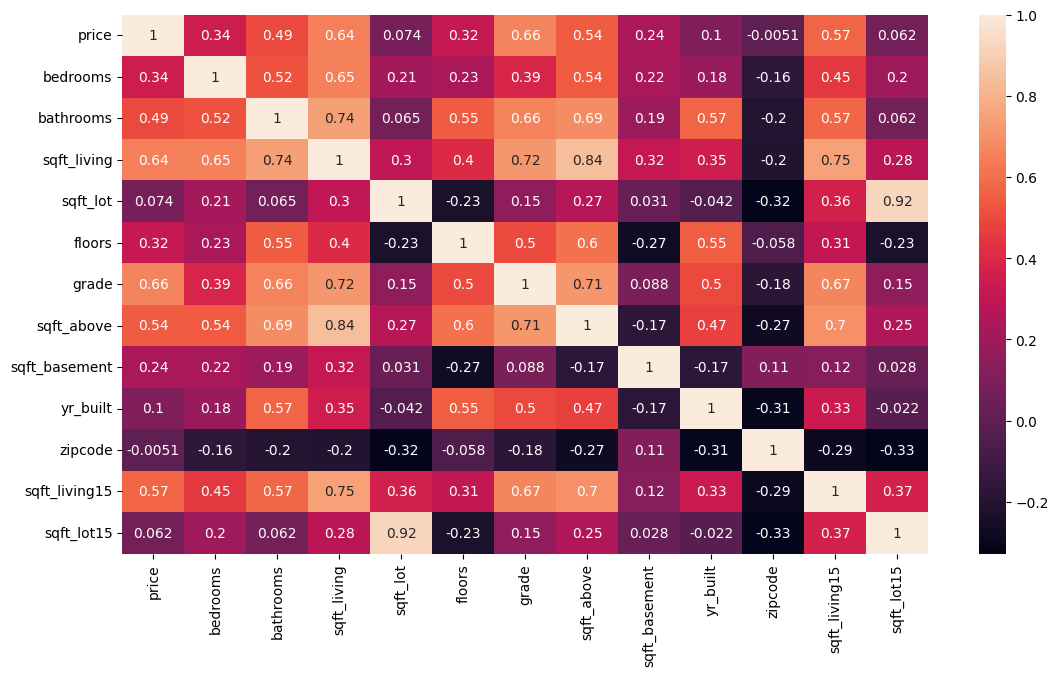

In [71]:
# Visualizing the correlation between predictors
plt.figure(figsize=(13,7))
sns.heatmap(df.corr(method='spearman', numeric_only=True), annot=True);

* ##### From the observations made above we see that there is a very high correlation between the predictor columns of 'sqft_above', 'sqft_living', 'sqft_living15, 'grade',and 'bathrooms'. Dropping some of these will eliminate multicollinearity features.
* ##### The columns to drop will be 'sqft_above', 'sqft_living15', 'grade',and 'bathrooms'

In [114]:
# Initializing a list of columns to drop
high_corr_pred = ['sqft_above', 'sqft_living15', 'grade', 'bathrooms']

# Dropping the columns permanently             
df.drop(high_corr_pred, inplace=True, axis=1)

# Viewing the the remaining dataset
print(df.shape)
df.head()

(15685, 11)


,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,sqft_basement,yr_built,zipcode,sqft_lot15,renovated
1,538000.0,3,2570,7242,2.0,NO,400.0,1951,98125,7639,renovated
3,604000.0,4,1960,5000,1.0,NO,910.0,1965,98136,5000,not renovated
4,510000.0,3,1680,8080,1.0,NO,0.0,1987,98074,7503,not renovated
5,1230000.0,4,5420,101930,1.0,NO,1530.0,2001,98053,101930,not renovated
6,257500.0,3,1715,6819,2.0,NO,0.0,1995,98003,6819,not renovated


>> #### _Fitting our baseline model_

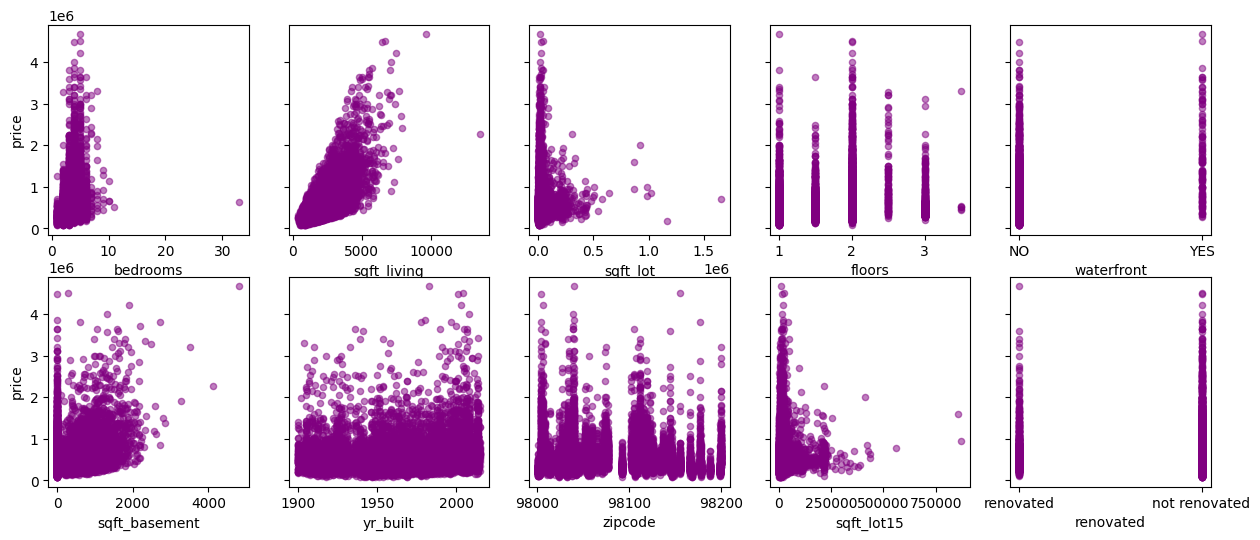

In [130]:
fig = plt.figure(figsize=(15,6))
axes = fig.subplots(nrows=2, ncols=5, sharey=True)
for xcol, ax in zip(['bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',\
    'sqft_basement', 'yr_built', 'zipcode', 'sqft_lot15', 'renovated'], axes.flatten()):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.5, color='purple')
plt.show()

In [116]:
# Checking for the highly correlated
df.corr(numeric_only=True)['price']

price            1.000000
bedrooms         0.307849
sqft_living      0.700289
sqft_lot         0.084646
floors           0.264169
sqft_basement    0.309250
yr_built         0.051664
zipcode         -0.046576
sqft_lot15       0.079715
Name: price, dtype: float64

In [117]:
# Determining the variables
y = df['price']
X_baseline = df['sqft_living']

In [118]:
# Fitting the model
baseline_model = sm.OLS(endog=y, exog=sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

# Our summary
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                 1.509e+04
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        18:23:49   Log-Likelihood:            -2.1751e+05
No. Observations:               15685   AIC:                         4.350e+05
Df Residuals:                   15683   BIC:                         4.350e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.363e+04   5091.120     -6.606      

* ##### The model is generally statistically sigmificant at a significance level of $\alpha = 0.05$ with a $p$_value of 0.0, and explains about 49% of the variance in price.
* ##### The constant and coefficient are statistically significant.
* ##### For a unit increase in square-foot living area, we see an associated increase in 275 dollars in selling price of the houses.

>>>> ### **Visualize the zipcode locations on Tableau**

In [72]:
df['zipcode'].value_counts(ascending=False)

98038    436
98103    426
98052    415
98042    408
98115    402
        ... 
98010     69
98102     64
98024     59
98148     42
98039     35
Name: zipcode, Length: 70, dtype: int64

In [73]:
df[df['zipcode'] == 98103][['price']].mean()

price    576270.197183
dtype: float64

>>>> ### **Note the above**

In [74]:
df.corr()['price']

/tmp/ipykernel_16162/441180871.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price']


price            1.000000
bedrooms         0.307849
bathrooms        0.523838
sqft_living      0.700289
sqft_lot         0.084646
floors           0.264169
grade            0.674614
sqft_above       0.605618
sqft_basement    0.309250
yr_built         0.051664
zipcode         -0.046576
sqft_living15    0.590870
sqft_lot15       0.079715
Name: price, dtype: float64

In [75]:
df_correlation = df.corr().style.background_gradient(cmap='plasma').format(precision=2)
df_correlation

/tmp/ipykernel_16162/3059178701.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_correlation = df.corr().style.background_gradient(cmap='plasma').format(precision=2)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
price,1.00,0.31,0.52,0.70,0.08,0.26,0.67,0.61,0.31,0.05,-0.05,0.59,0.08
bedrooms,0.31,1.00,0.51,0.58,0.02,0.18,0.35,0.47,0.30,0.15,-0.15,0.39,0.02
bathrooms,0.52,0.51,1.00,0.75,0.08,0.51,0.66,0.68,0.27,0.51,-0.20,0.57,0.08
sqft_living,0.70,0.58,0.75,1.00,0.16,0.36,0.76,0.87,0.42,0.32,-0.20,0.76,0.18
sqft_lot,0.08,0.02,0.08,0.16,1.00,-0.01,0.11,0.17,0.02,0.05,-0.13,0.14,0.72
floors,0.26,0.18,0.51,0.36,-0.01,1.00,0.46,0.53,-0.24,0.49,-0.06,0.28,-0.01
grade,0.67,0.35,0.66,0.76,0.11,0.46,1.00,0.76,0.16,0.44,-0.18,0.72,0.11
sqft_above,0.61,0.47,0.68,0.87,0.17,0.53,0.76,1.00,-0.06,0.42,-0.26,0.73,0.18
sqft_basement,0.31,0.30,0.27,0.42,0.02,-0.24,0.16,-0.06,1.00,-0.13,0.07,0.19,0.02
yr_built,0.05,0.15,0.51,0.32,0.05,0.49,0.44,0.42,-0.13,1.00,-0.34,0.32,0.07


>> **Recommendations**

* Development of a comprehensive database the agency can use to track the renovation projects that would improve property value and, we must demonstrate an iterative app

* Doing more renovations

```*Challenges in the market*```

* *What are the problems in the market and what are we trying to solve.*
* What are the best performing properties in the market?
* What is the general structure of the property?
* When were these houses built?
* Competition from other real estate agencies

* The agency seeks to improve on their income depending on what properties to invest in and what is ideal for the clients to buy.
* Advicing homeowners on how renovation might potentially increase the 